# PIXEL-ART COLOR-BY-NUMBER GENERATOR

# Clone repository

In [25]:
!!git clone https://github.com/RobertoFont/Blog.git Blog
%cd Blog/pixel-art-color-by-number-generator

/content/Blog/pixel-art-color-by-number-generator/Blog/pixel-art-color-by-number-generator/Blog/pixel-art-color-by-number-generator/Blog/pixel-art-color-by-number-generator


# Load libraries

In [26]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

from utils.image import crop_central, limit_colors, pixelate_image
from utils.sheet import fig2im, get_text_for_cell, generate_color_by_number_sheet

# Configure woksheet

In [27]:
from pathlib import Path
import os

def upload_files(input_dir=Path()):
  from google.colab import files
  input_dir.mkdir(parents=True, exist_ok=True)
  prev_dir = os.getcwd()
  os.chdir(input_dir)
  uploaded = files.upload()
  os.chdir(prev_dir)
  return [input_dir / k for k in uploaded.keys()]


# @title Input image
IMAGE = "samples/charmander.png"  # @param {type: 'string'}

# @markdown Mark upload to upload your own image
upload = True #@param {type:"boolean"}

if upload:
  upload_dir = Path("samples")
  paths = upload_files(upload_dir)
  IMAGE = paths[0]

print(IMAGE)

Saving Adsız.png to Adsız.png
samples/Adsız.png


In [28]:
# @title Worksheet configuration
# @markdown Use the slider to set the desired number of colors.

# @markdown The `MODE` can be: `'n'` (Each cell displays the number of the corresponding color), `'a'` (Each cell displays an addition that must be solved to obtain the corresponding color) or `'s'` (Each cell displays a subtraction that must be solved to obtain the corresponding color)
NUM_COLORS = 6 #@param {type:"slider", min:2, max:8, step:1}
MODE = "n" #@param ["n", "a", "s"]


# Generate worksheet

## Process image

In [29]:
im = Image.open(IMAGE)
im = im.convert('RGBA')
im = crop_central(im)
im = pixelate_image(im)
im, colors = limit_colors(im, NUM_COLORS)

## Show preview

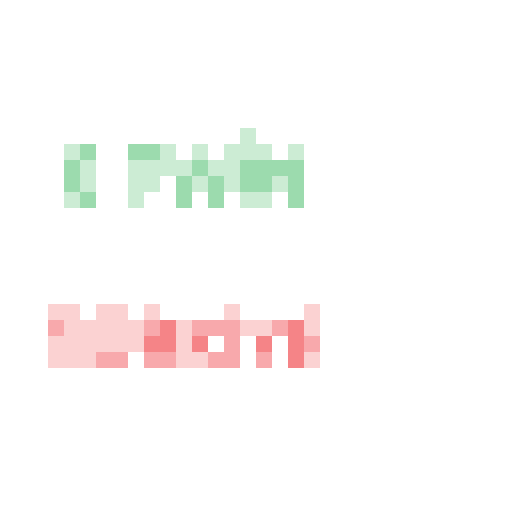

In [30]:
image_h = im.resize((512,512), Image.NEAREST)
display(image_h)

## Generate worksheet

In [31]:
print_ready = generate_color_by_number_sheet(im, colors, mode=MODE)

<Figure size 4800x4800 with 0 Axes>

<Figure size 2584x760 with 0 Axes>

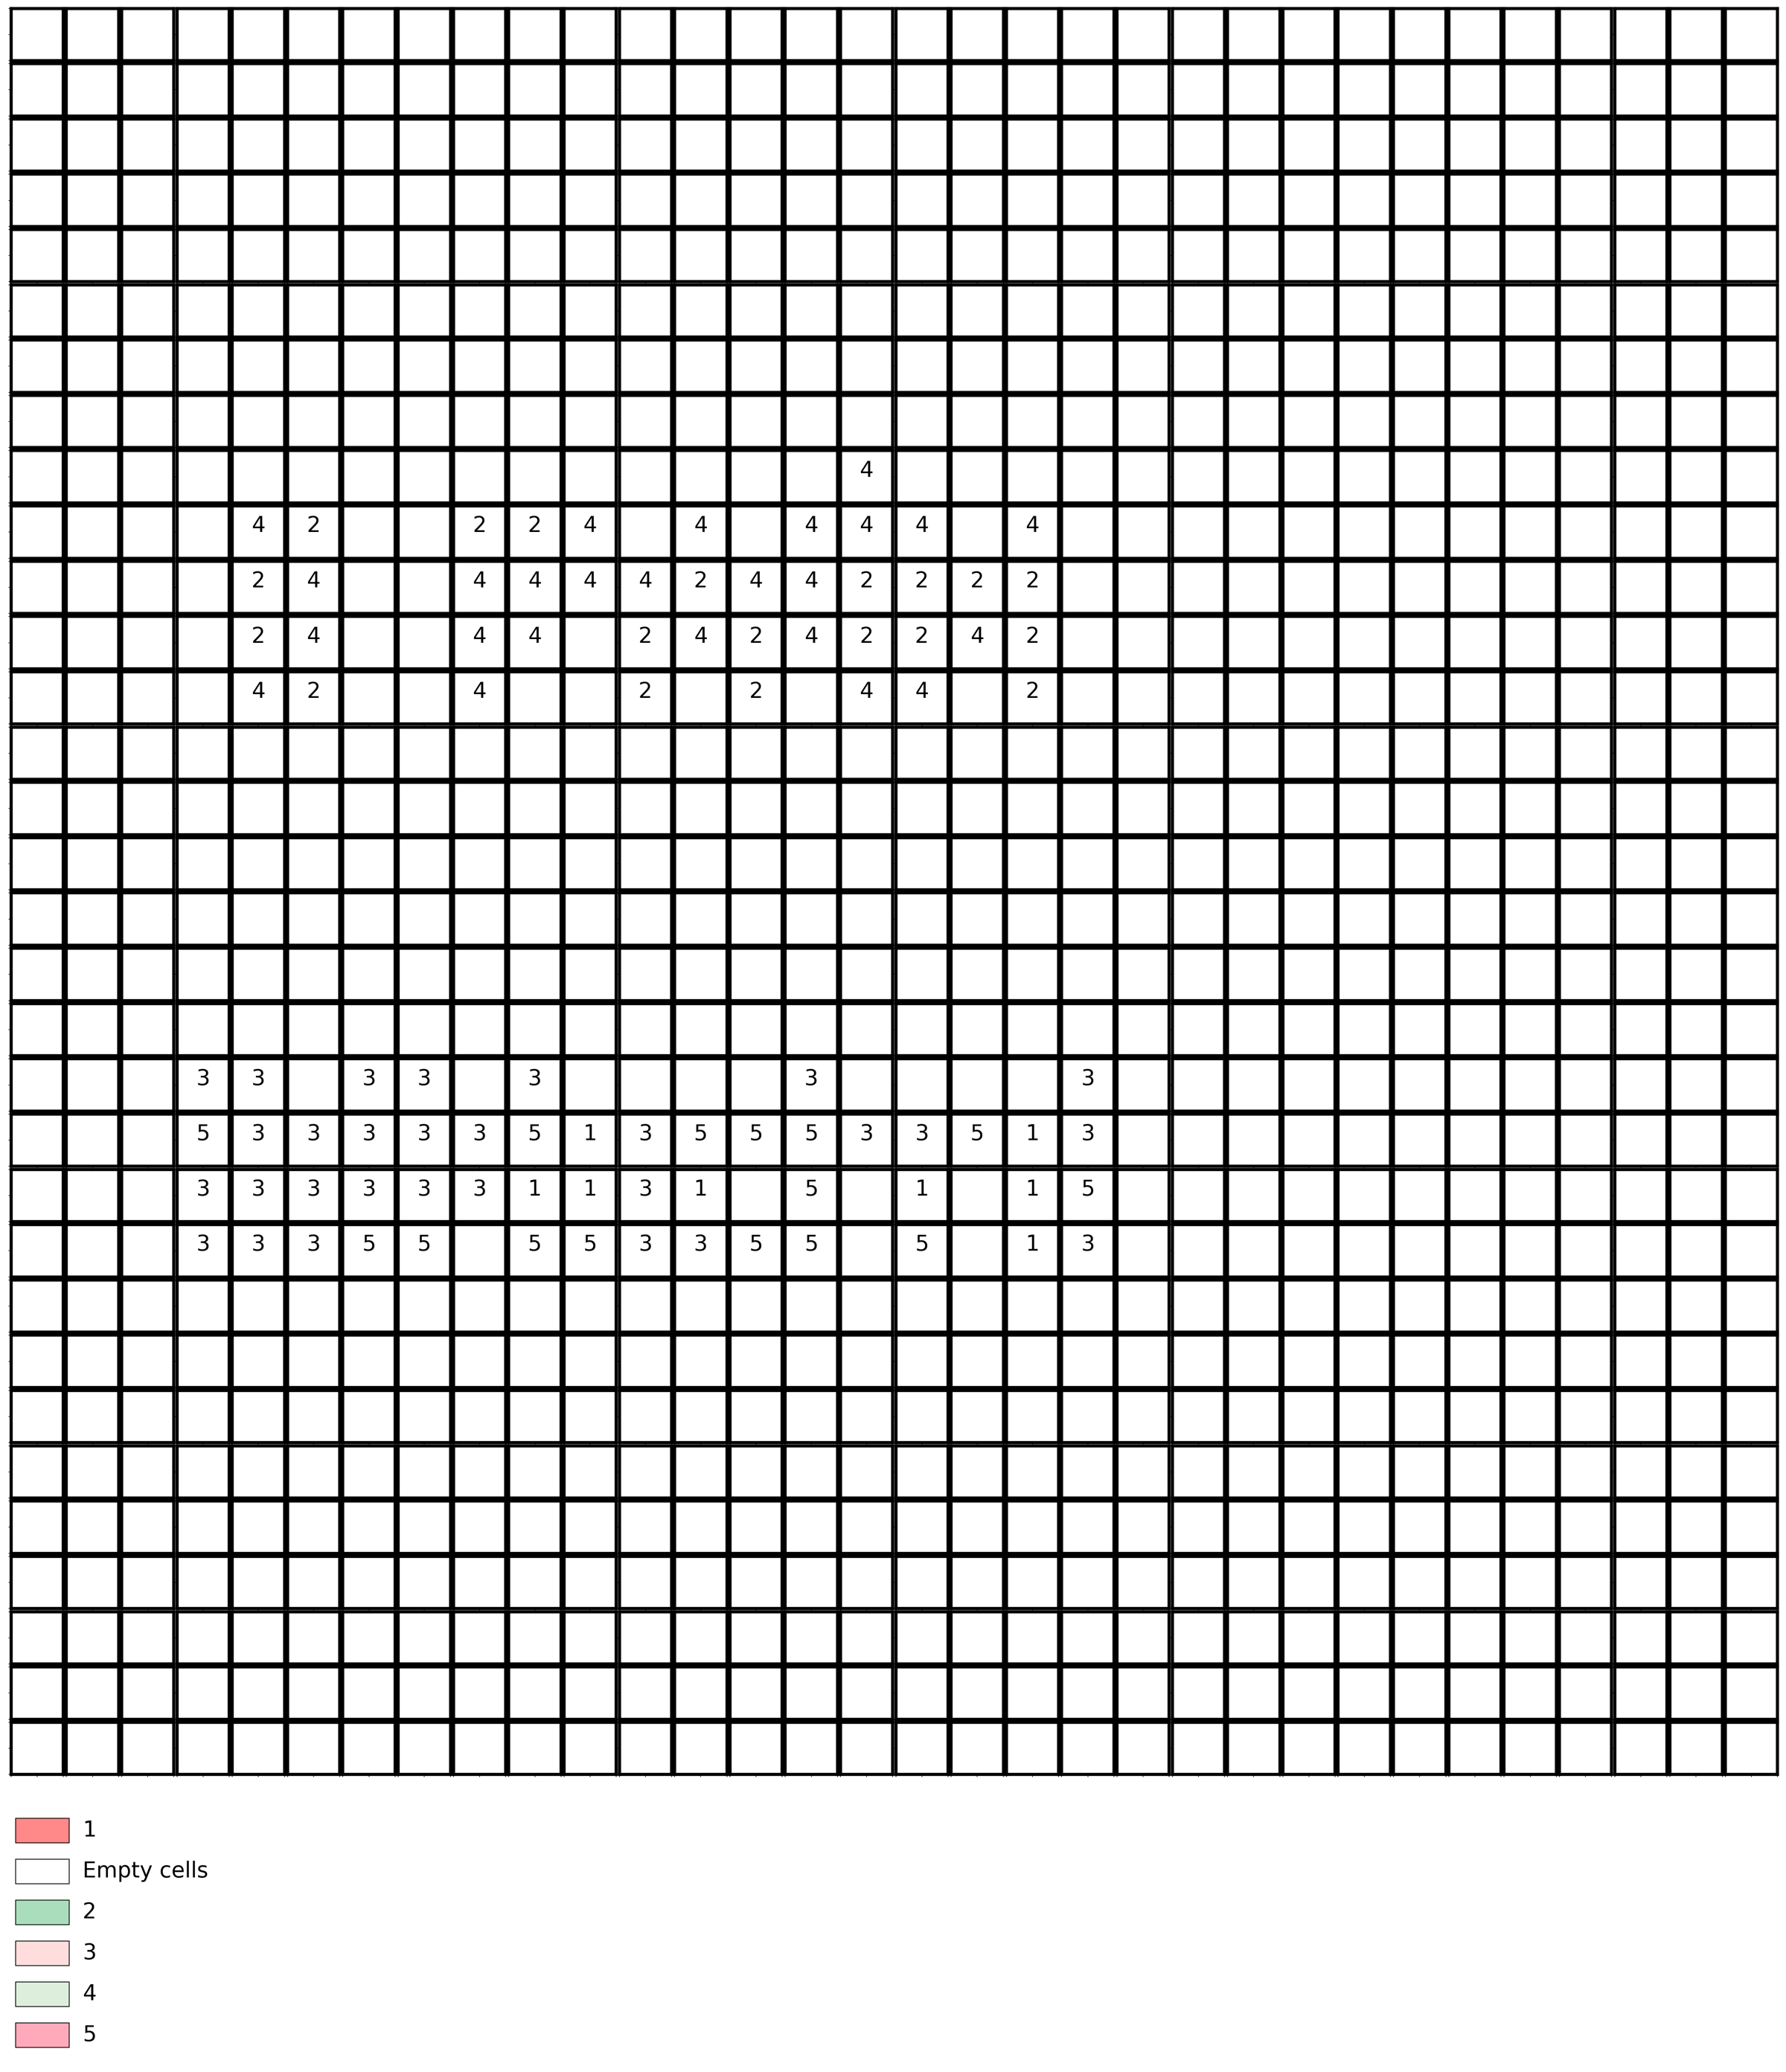

In [32]:
display(print_ready)

Right-click and "Save image as" to save image to your local drive